### TEAM  10

 E.VIGNESH (CB.EN.P2DSC21010)

 N.SAI DHANUSH (CB.EN.P2DSC21016)

# QUESTION 1:

# PERFORMING MULTI-CLASS CLASSIFICATION FOR VARIOUS SPEECH EMOTIONS. ( USING DEEP LEARNING)

## LINK FOR DOWNLOADING DATASET

https://drive.google.com/drive/folders/1S3j7CkyGWDpjS6OMSGOL0ka_osKff_Vg?usp=sharing



### Importing Dependencies

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [2]:
my_path = 'C:/Users/voice/RAVDESS-RawData'

### File Naming Convention

Each of the 1440 files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 03-01-06-01-02-01-12.wav). These identifiers define the stimulus characteristics:

### FileName Identifiers

Modality (01 = full-AV, 02 = video-only, 03 = audio-only).

Vocal channel (01 = speech, 02 = song).

Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).

Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.

Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").

Repetition (01 = 1st repetition, 02 = 2nd repetition).

Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).


### Emotion Labels

01 = neutral

02 = calm

03 = happy

04 = sad

05 = angry

06 = fearful

07 = disgust

08 = surprised

In [3]:
import os
my_data = os.listdir(my_path)
print("this is the len of our data: ", len(my_data))
print("this is an example of a wave file:", my_data[50])
print("this index position represents the emotion label:", my_data[50][6:8])

this is the len of our data:  1440
this is an example of a wave file: 03-01-01-01-02-01-03.wav
this index position represents the emotion label: 01


### Load audio file and visualize its waveform (using librosa)


In [4]:
data, sampling_rate = librosa.load(my_path+'/03-01-01-01-02-01-03.wav')

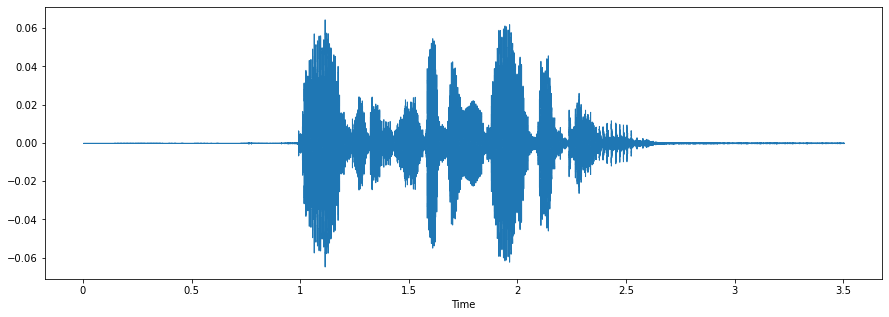

In [5]:
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

In [6]:
pip install python_speech_features

Note: you may need to restart the kernel to use updated packages.


### Convert the audio waveform

Mel-frequency cepstral coefficients (MFCC) extraction

This Function returns:

    Features
    Labels

In [7]:
from python_speech_features import mfcc
import scipy.io.wavfile
import numpy as np


emotions_num = ["Neutral-01","Calm-02","Happy-03","Sad-04","Angry-05","Fearful-06","Disgust-07","Surprised-08"]
actors = ["01","02","03","04","05","06","07","08","09","10","11","12",
         "13","14","15","16","17","18","19","20","21","22","23","24"]


def mfcc_extraction(path, modal_vocal, emotions_num, actors):
    labels = []
    mfcc_features = []
    
    #with repetition number: 1 and statement number 1 and emotional intensity number #1
    for index1,emotion_num in enumerate(emotions_num):
        for index,actor in enumerate(actors):
            sig, rate = librosa.load(path+modal_vocal+emotion_num[-2:]+"-01-01-01-"+actor+".wav", sr=16000)
            mfcc_feat = mfcc(sig,rate)
            mfcc_features.append(mfcc_feat)
            
            labels.append(emotion_num[:-3])
    
    #with repetition number: 1 and statement number 2 and emotional intensity number 1
    for index1,emotion_num in enumerate(emotions_num):
        for index,actor in enumerate(actors):
            sig, rate = librosa.load(path+modal_vocal+emotion_num[-2:]+"-01-02-01-"+actor+".wav", sr=16000)
            mfcc_feat = mfcc(sig,rate)
            mfcc_features.append(mfcc_feat)
            
            labels.append(emotion_num[:-3])
            
    #with repetition number: 2 and statement number 1 and emotional intensity number #1
    for index1,emotion_num in enumerate(emotions_num):
        for index,actor in enumerate(actors):
            sig, rate = librosa.load(path+modal_vocal+emotion_num[-2:]+"-01-01-02-"+actor+".wav", sr=16000)
            mfcc_feat = mfcc(sig,rate)
            mfcc_features.append(mfcc_feat)
            
            labels.append(emotion_num[:-3])
            
    #with repetition number: 2 and statement number 2 and emotional intensity number 1
    for index1,emotion_num in enumerate(emotions_num):
        for index,actor in enumerate(actors):
            sig, rate = librosa.load(path+modal_vocal+emotion_num[-2:]+"-01-02-02-"+actor+".wav", sr=16000)
            mfcc_feat = mfcc(sig,rate)
            mfcc_features.append(mfcc_feat)
            
            labels.append(emotion_num[:-3])
    
    #with repetition number: 1 and statement number 1 and emotional intensity number #2
    for index1,emotion_num in enumerate(emotions_num):
        for index,actor in enumerate(actors):
            if emotion_num != "Neutral-01":
                sig, rate = librosa.load(path+modal_vocal+emotion_num[-2:]+"-02-01-01-"+actor+".wav", sr=16000)
                mfcc_feat = mfcc(sig,rate)
                mfcc_features.append(mfcc_feat)
                
                labels.append(emotion_num[:-3])
    
    #with repetition number: 1 and statement number 2 and emotional intensity number 2
    for index1,emotion_num in enumerate(emotions_num):
        for index,actor in enumerate(actors):
            if emotion_num != "Neutral-01":
                sig, rate = librosa.load(path+modal_vocal+emotion_num[-2:]+"-02-02-01-"+actor+".wav", sr=16000)
                mfcc_feat = mfcc(sig,rate)
                mfcc_features.append(mfcc_feat)
                
                labels.append(emotion_num[:-3])
            
    #with repetition number: 2 and statement number 1 and emotional intensity number #2
    for index1,emotion_num in enumerate(emotions_num):
        for index,actor in enumerate(actors):
            if emotion_num != "Neutral-01":
                sig, rate = librosa.load(path+modal_vocal+emotion_num[-2:]+"-02-01-02-"+actor+".wav", sr=16000)
                mfcc_feat = mfcc(sig,rate)
                mfcc_features.append(mfcc_feat)
                
                labels.append(emotion_num[:-3])
            
    #with repetition number: 2 and statement number 2 and emotional intensity number 2
    for index1,emotion_num in enumerate(emotions_num):
        for index,actor in enumerate(actors):
            if emotion_num != "Neutral-01":
                sig, rate = librosa.load(path+modal_vocal+emotion_num[-2:]+"-02-02-02-"+actor+".wav", sr=16000)
                mfcc_feat = mfcc(sig,rate)
                mfcc_features.append(mfcc_feat)
                
                labels.append(emotion_num[:-3])      

    return mfcc_features, labels

In [8]:
mfcc_features_and_labels = mfcc_extraction(my_path,'/03-01-', emotions_num, actors)

### In our function we are extracting:
2(repetition)

2(statement)

2(emotional)

8(emotions)

24(actors)

1440 examples

In [9]:
# exract features and labels from 
mfcc_features, mfcc_labels = mfcc_features_and_labels
print("len of examples:", len(mfcc_features))
print("len of labels:", len(mfcc_labels))
print()
print("feature dimension:", mfcc_features[0].ndim)
print("feature shape:", mfcc_features[1].shape)
print()
mfcc_labels = np.array(mfcc_labels)
print(mfcc_features[0],mfcc_labels[0])

len of examples: 1440
len of labels: 1440

feature dimension: 2
feature shape: (363, 13)

[[-2.18306024e+01 -3.20043785e+01  1.63623961e+00 ...  1.51798636e+01
  -1.16716009e+01 -2.84455921e+00]
 [-3.60436534e+01  0.00000000e+00  0.00000000e+00 ...  6.74820084e-14
   0.00000000e+00  3.50716881e-14]
 [-2.31807954e+01 -3.50252179e+01 -1.09309837e+01 ... -5.13416197e+00
  -3.13953157e+00 -4.02089669e+00]
 ...
 [-2.01205862e+01 -2.97380244e+01 -1.71999899e-01 ...  4.60930548e+00
   3.42111213e+00 -1.32853321e+00]
 [-2.22119191e+01 -3.08699543e+01 -7.99719638e+00 ... -6.17977579e-01
   2.82549932e+00 -1.07647800e+01]
 [-3.60436534e+01  0.00000000e+00  0.00000000e+00 ...  6.74820084e-14
   0.00000000e+00  3.50716881e-14]] Neutral


### Zero Padding Function

In [10]:
def zero_pad(features):
    
    new_spoken_train = []
    max_shape = 0
    for x in features:
        all_shapes = x.shape[0]
        if all_shapes > max_shape:
            max_shape = all_shapes

    for x in features:
        difference = max_shape-x.shape[0]
        zero_padded = np.pad(x,((0,difference),(0,0)), "constant")
        new_spoken_train.append(zero_padded)

    new_spoken_train = np.array(new_spoken_train)
    
    return new_spoken_train

mfcc_features = zero_pad(mfcc_features)

In [11]:
print(mfcc_features.shape)
print(526*13)

(1440, 526, 13)
6838


### Flatteing MFCC Features


In [12]:
flatten_mfcc_features = np.reshape(mfcc_features,(mfcc_features.shape[0],6838))
print(flatten_mfcc_features.shape)

(1440, 6838)


### Standardization

In [13]:
from sklearn.preprocessing import StandardScaler

data = flatten_mfcc_features
scaler = StandardScaler()
mfcc_features = scaler.fit_transform(data)

### Oversample "NEUTRAL" (EMOTION) in order to match our dataset

In [14]:
dictionary = {}
for i in mfcc_labels:
    dictionary[i] = dictionary.get(i,0) + 1

print(dictionary)

{'Neutral': 96, 'Calm': 192, 'Happy': 192, 'Sad': 192, 'Angry': 192, 'Fearful': 192, 'Disgust': 192, 'Surprised': 192}


In [15]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
new_mfcc_features,  mfcc_labels = ros.fit_resample(mfcc_features,  mfcc_labels)

dictionary_2 = {}
for i in mfcc_labels:
    dictionary_2[i] = dictionary_2.get(i,0) + 1

print(dictionary_2)

{'Neutral': 192, 'Calm': 192, 'Happy': 192, 'Sad': 192, 'Angry': 192, 'Fearful': 192, 'Disgust': 192, 'Surprised': 192}


### Reshape back MFCC Features

In [16]:
new_mfcc_features = np.reshape(new_mfcc_features,(new_mfcc_features.shape[0],526, 13))

In [17]:
new_mfcc_features.shape


(1536, 526, 13)

### Train-Test Split

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_mfcc_features, mfcc_labels, test_size=0.30, 
                                                    random_state=42, stratify = mfcc_labels, shuffle= True)

### One-Hot Encoding of Labels

In [19]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# define example
y_train = y_train
y_train_values = array(y_train)
# integer encode
y_train_label_encoder = LabelEncoder()
y_train_integer_encoded = y_train_label_encoder.fit_transform(y_train_values)
# binary encode
y_train_onehot_encoder = OneHotEncoder(sparse=False)
y_train_integer_encoded = y_train_integer_encoded.reshape(len(y_train_integer_encoded), 1)
y_train_onehot_encoded = y_train_onehot_encoder.fit_transform(y_train_integer_encoded)
print(y_train_onehot_encoded.shape)

(1075, 8)


In [20]:
# define example
y_test = y_test
y_test_values = array(y_test)
# integer encode
y_test_label_encoder = LabelEncoder()
y_test_integer_encoded = y_test_label_encoder.fit_transform(y_test_values)
# binary encode
y_test_onehot_encoder = OneHotEncoder(sparse=False)
y_test_integer_encoded = y_test_integer_encoded.reshape(len(y_test_integer_encoded), 1)
y_test_onehot_encoded = y_test_onehot_encoder.fit_transform(y_test_integer_encoded)
print(y_test_onehot_encoded.shape)

(461, 8)


In [21]:
print(X_train.shape)
print(y_train_onehot_encoded.shape)
print(X_test.shape)
print(y_test_onehot_encoded.shape)

(1075, 526, 13)
(1075, 8)
(461, 526, 13)
(461, 8)


In [22]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install tensorflow

  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached libclang-14.0.1-py2.py3-none-win_amd64.whl (14.2 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached protobuf-3.19.4-cp38-cp38-win_amd64.whl (895 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached tensorboard-2.9.1-py3-none-any.whl (5.8 MB)
  Using cached grpcio-1.46.3-cp38-cp38-win_amd64.whl (3.5 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached absl_py-1.1.0-py3-none-any.whl (123 kB)
  Using cached tensorflow_estimator-2.9.0-py2.py3-none-any.whl (438 kB)
  Using cached tensorflow_io_gcs_filesystem-0.26.0-cp38-cp38-win_amd64.whl (1.5 MB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (781 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any

### CONVOLUTIONAL NEURAL NETWORKS

In [24]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint

len_of_labels = len(y_train_onehot_encoded[0])
model = Sequential()

model.add(Conv1D(128, 4, padding='same', input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=(2)))
model.add(Conv1D(128, 4, padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(MaxPooling1D(pool_size=(2)))
model.add(Conv1D(128, 4, padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(MaxPooling1D(pool_size=(2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(len_of_labels))
model.add(Activation('softmax'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 526, 128)          6784      
                                                                 
 activation (Activation)     (None, 526, 128)          0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 263, 128)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 263, 128)          65664     
                                                                 
 activation_1 (Activation)   (None, 263, 128)          0         
                                                                 
 dropout (Dropout)           (None, 263, 128)          0         
                                                        

### COMPILE MODEL

In [26]:
from keras.optimizers import RMSprop

model.compile(loss= "categorical_crossentropy",
              optimizer= RMSprop(lr=0.001),
              metrics=['accuracy'])

cnnhistory= model.fit(X_train, y_train_onehot_encoded,batch_size= 64, epochs= 40,validation_data=(X_test, y_test_onehot_encoded))

Epoch 1/40


C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


17/17 [==============================] - 3s 131ms/step - loss: 2.1571 - accuracy: 0.2400 - val_loss: 1.8202 - val_accuracy: 0.2842
Epoch 2/40
17/17 [==============================] - 2s 107ms/step - loss: 1.6317 - accuracy: 0.3860 - val_loss: 1.6279 - val_accuracy: 0.4230
Epoch 3/40
17/17 [==============================] - 2s 107ms/step - loss: 1.4550 - accuracy: 0.4716 - val_loss: 1.4974 - val_accuracy: 0.4859
Epoch 4/40
17/17 [==============================] - 2s 114ms/step - loss: 1.2181 - accuracy: 0.5535 - val_loss: 1.3716 - val_accuracy: 0.5380
Epoch 5/40
17/17 [==============================] - 2s 114ms/step - loss: 1.0509 - accuracy: 0.6251 - val_loss: 1.3277 - val_accuracy: 0.5445
Epoch 6/40
17/17 [==============================] - 2s 112ms/step - loss: 0.9380 - accuracy: 0.6577 - val_loss: 1.2548 - val_accuracy: 0.5553
Epoch 7/40
17/17 [==============================] - 2s 112ms/step - loss: 0.8035 - accuracy: 0.7107 - val_loss: 1.1730 - val_accuracy: 0.6464
Epoch 8/40
17/17 

In [27]:
result = model.evaluate(X_test, y_test_onehot_encoded)
print("validation accuracy:", result[1])

15/15 [==============================] - 0s 11ms/step - loss: 1.2760 - accuracy: 0.7223
validation accuracy: 0.7223427295684814


### PLOTTING LOSS & ACCURACY

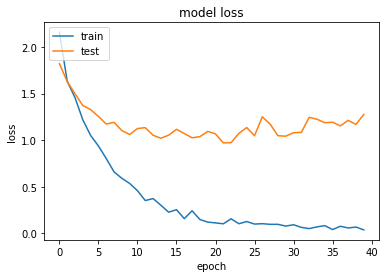

In [28]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

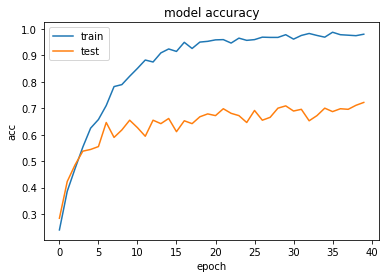

In [29]:
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()